# ***Assignment 3:***

**1- Take 10 points of a data x and y (Generate it from numpy library of python using following command)**

x = np.random.rand(10, 1)

y = 2 * x + np.random.randn(10, 1)

In [663]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [664]:
# x = np.random.rand(10, 1)
# y = 2 * x + np.random.randn(10, 1)

In [665]:
x = np.array([0.80581147, 0.38348503, 0.6652413, 0.64155897, 0.24070017, 0.35429554, 0.70827991, 0.32378987, 0.8708774 , 0.22902348])
y = np.array([ 2.27515993, -0.15308204, 1.43590601, 0.79686399, -0.45275524, 2.03862963,  1.16148089, 2.68814558, 0.70110376, 0.04881045])

In [666]:
# x_new = np.concatenate((np.ones((10,1)), x), axis=1) #  x0=1 | x1=val
# print(x_new)

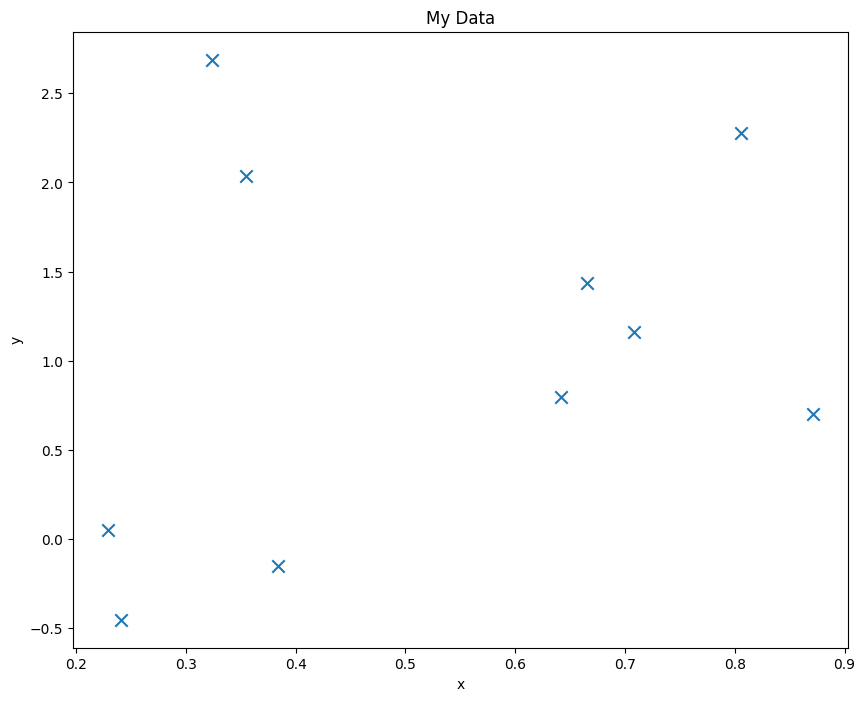

In [667]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, marker='x', s=80)
plt.title('My Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [668]:
t0 =0.4
t1 =1.3

In [669]:
def h(t0, t1):
     return (t0 + t1*x)

In [670]:
def J(t0, t1):
    m = len(y) 
    prediction_y = h(t0, t1)
    error = np.square(prediction_y - y)
    cost = (1/(2*m)) * np.sum(error)
    return cost

In [671]:
# print(x_new.shape)
# print(y.shape)

In [672]:
iterations = 10
alpha = 0.1 
# this is my learning_rate

In [673]:
def gradient_descent(t0, t1, alpha, iterations):
    cost_history = []
    m = len(y) 

    print("theta1                   | theta2                |       J        |            Gradient\n")

    for iteration in range(iterations):
        hypothesis = h(t0, t1)
        gradient0 = np.sum(hypothesis-y) / m
        gradient1 = np.sum((hypothesis-y) * x) / m
        print("%.5f                   %.5f                        %.5f                 %.5f" %(t0, t1, J(t0, t1), gradient0))

        t0 = t0 - alpha * gradient0
        t1 = t1 - alpha * gradient1
        t0 = t0 - alpha*gradient0
        t1 = t1 - alpha*gradient1
        cost = J(t0, t1)
        cost_history.append(cost)

    return t0, t1, cost_history

# **b) A table with columns J, θ0 and θ1 and at each iteration make a plot of J(θ0, θ1) on which value of J should be marked at updated(θ0, θ1) to see how far are you from your objective. Working of each iteration should also be submitted.**

In [674]:
(t0_final, t1_final, c) = gradient_descent(t0, t1, alpha, iterations)
plt.show()

theta1                   | theta2                |       J        |            Gradient

0.40000                   1.30000                        0.46907                 0.02497
0.39501                   1.29706                        0.46892                 0.01844
0.39132                   1.29484                        0.46884                 0.01359
0.38860                   1.29315                        0.46880                 0.00999
0.38660                   1.29185                        0.46877                 0.00731
0.38514                   1.29084                        0.46876                 0.00533
0.38407                   1.29005                        0.46875                 0.00385
0.38330                   1.28943                        0.46875                 0.00275
0.38275                   1.28892                        0.46874                 0.00194
0.38236                   1.28851                        0.46874                 0.00133


In [675]:
def objective(x):
        y = [t0_final + t1_final*xx for xx in x]
        return y

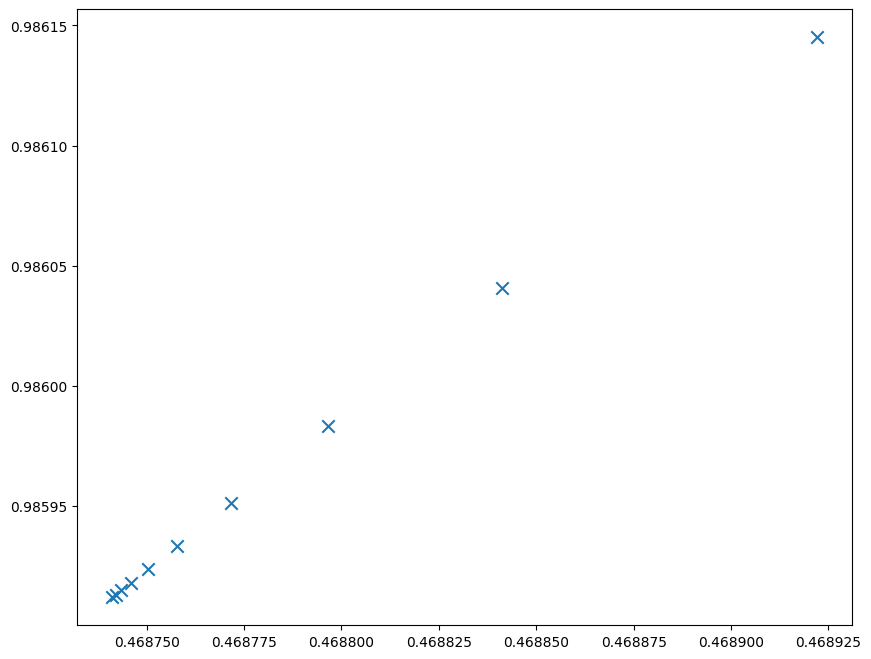

In [676]:
all_candidates = np.asarray(c)
y_all = objective(c)
plt.figure(figsize=(10, 8))
plt.scatter(all_candidates, y_all, marker='x', s=80)
plt.show()

# **a) Plot of J(θ0, θ1)on python with a point specifying value of J at initially taken θ0 and θ1.**

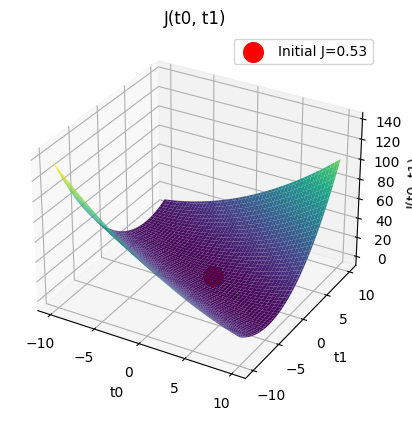

In [677]:
from mpl_toolkits.mplot3d import Axes3D

t0_vals = np.linspace(-10, 10, 100)
t1_vals = np.linspace(-10, 10, 100)

t0_grid, t1_grid = np.meshgrid(t0_vals, t1_vals)

# Compute J(t0, t1) for each t0, t1 pair in the grid
J_vals = np.zeros_like(t0_grid)
for i in range(t0_vals.size):
    for j in range(t1_vals.size):
        J_vals[i,j] = J(t0_vals[i], t1_vals[j])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(t0_grid, t1_grid, J_vals, cmap='viridis')

# Add a point to show the initial value of J
t0_i = 0.92
t1_i = 0.92
J_i = J(t0_i, t1_i)
ax.scatter(t1_i, t1_i, J_i, c='red', s=200, label='Initial J={:.2f}'.format(J_i))
ax.legend()


ax.set_title('J(t0, t1)')
ax.set_xlabel('t0')
ax.set_ylabel('t1')
ax.set_zlabel('J(t0, t1)')

plt.show()


# **7- Draw a scatter plot of x and y with the plot of line y = θ0 + θ1x, where θ0 and θ1 are your final values obtained after the last iteration of gradient descent method.**

In [678]:
print("y = %.5f + %.5fx" %(t0_final, t1_final))

y = 0.38210 + 1.28816x


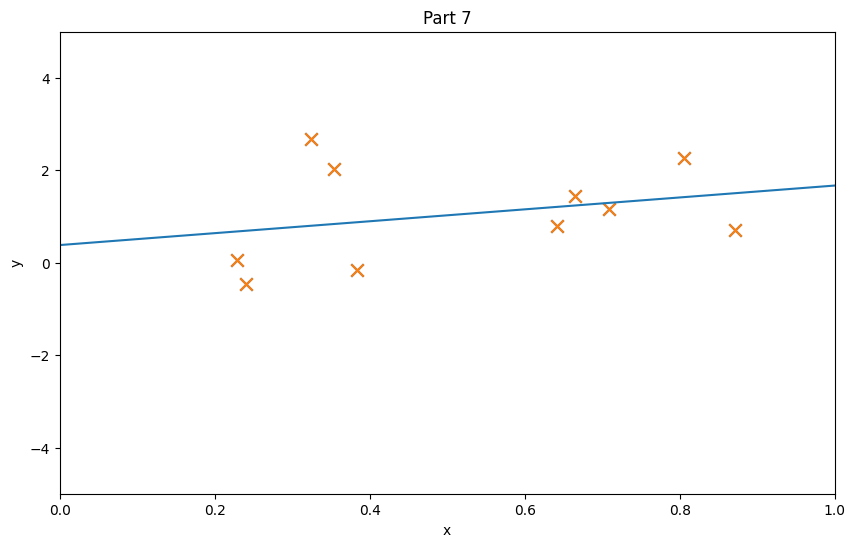

In [679]:
plt.figure(figsize=(10,6))
plt.axis([0, 1,-5,5])
plt.scatter(x, y, marker='x', s=80)
best_fit_x = np.linspace(0, 1, 100)
best_fit_y = [t0_final + t1_final*xx for xx in best_fit_x]
plt.plot(best_fit_x, best_fit_y, '-')
plt.scatter(x, y, marker='x', s=80)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Part 7')
plt.show()